<a href="https://colab.research.google.com/github/HaifaAziz1/IT326-Mushroom-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining Phase 3**



---
introduction goes here


# 1. **Classification**

### Loading data & defining splits

In this step, we began by importing the essential libraries for this phase.

We used pandas and numpy for data handling, matplotlib and seaborn for visualization, and scikit-learn for machine learning algorithms and evaluation metrics.


The dataset is loaded directly from our GitHub repository containing the preprocessed mushroom characteristics.
We separated the target variable ('class' - indicating edible or poisonous) from the feature set, then defined three different train-test splits:

*   60% train / 40% test
*   70% train / 30% test
*   80% train / 20% test


this step is essential to compare how data partitioning affects model performance.



In [10]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# loading data
url = "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)

# separating target from features
X = df.drop('class', axis=1)
y = df['class']

# define different split ratios
split_ratios = [0.4, 0.3, 0.2]
split_names = ['60/40', '70/30', '80/20']
results = []

## **a. Decision Tree (Gini index)**


### Model Training & Evaluation




We now implement our experimental design by training and evaluating Decision Tree models across the three predefined data splits:

For every split scenario, we:

* Partition the dataset into training and testing subsets
* Train a Decision Tree with consistent parameters (Gini criterion, max depth 3)

* Evaluate performance through accuracy scores and confusion matrices

* Visualize the resulting decision tree


Note: after experimenting with various tree depths, we selected max_depth = 3 as it provided the optimal balance between model performance (98% accuracy) and generalization capability, avoiding the overfitting observed in deeper trees that achieved 100% accuracy.


SPLIT: 60/40 (Test Size: 0.4)
Training set size: 4874
Test set size: 3250

=== DECISION TREE RESULTS ===
Test Accuracy: 98.15%
Confusion Matrix:
[[1665   18]
 [  42 1525]]


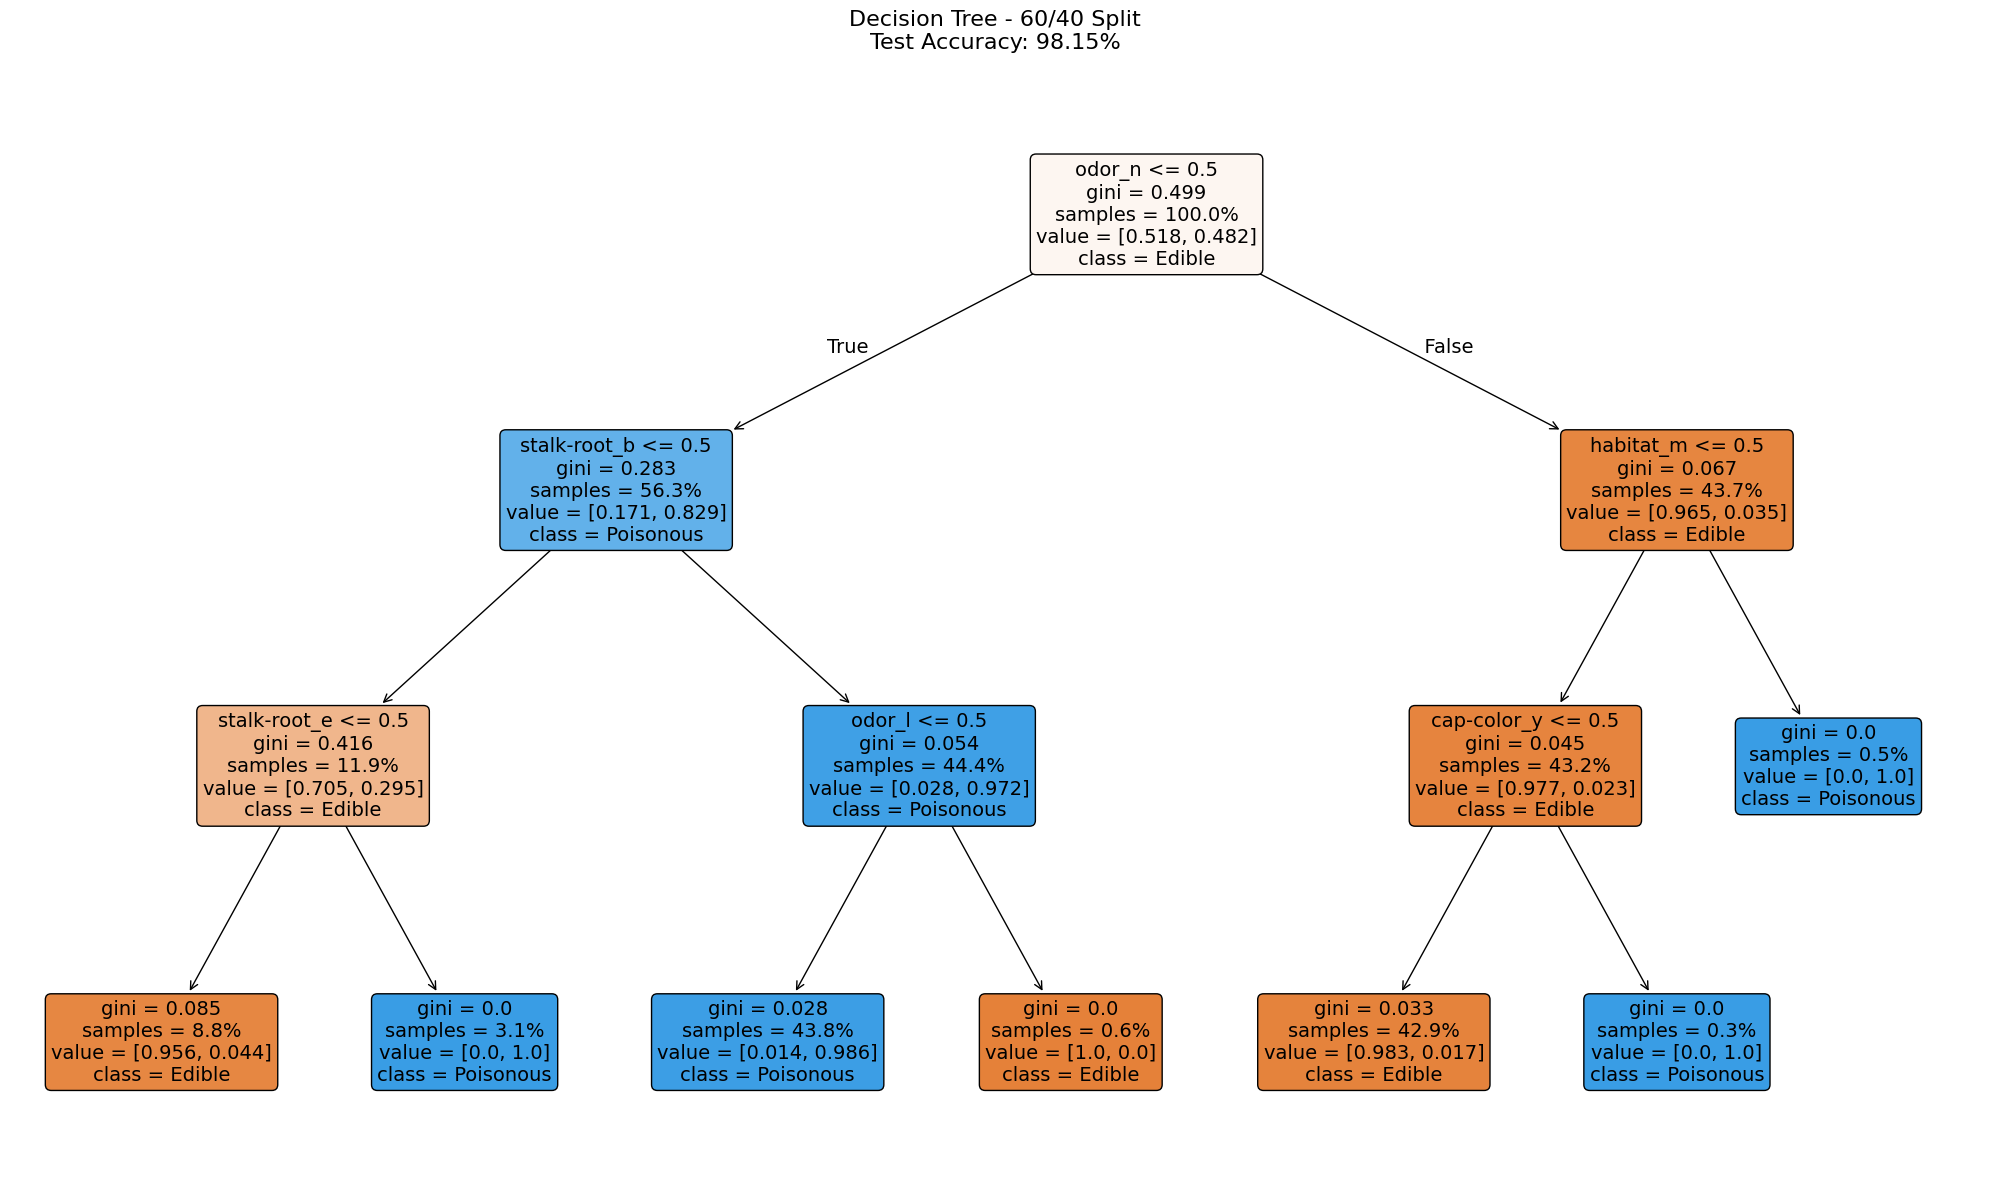


SPLIT: 70/30 (Test Size: 0.3)
Training set size: 5686
Test set size: 2438

=== DECISION TREE RESULTS ===
Test Accuracy: 98.07%
Confusion Matrix:
[[1248   15]
 [  32 1143]]


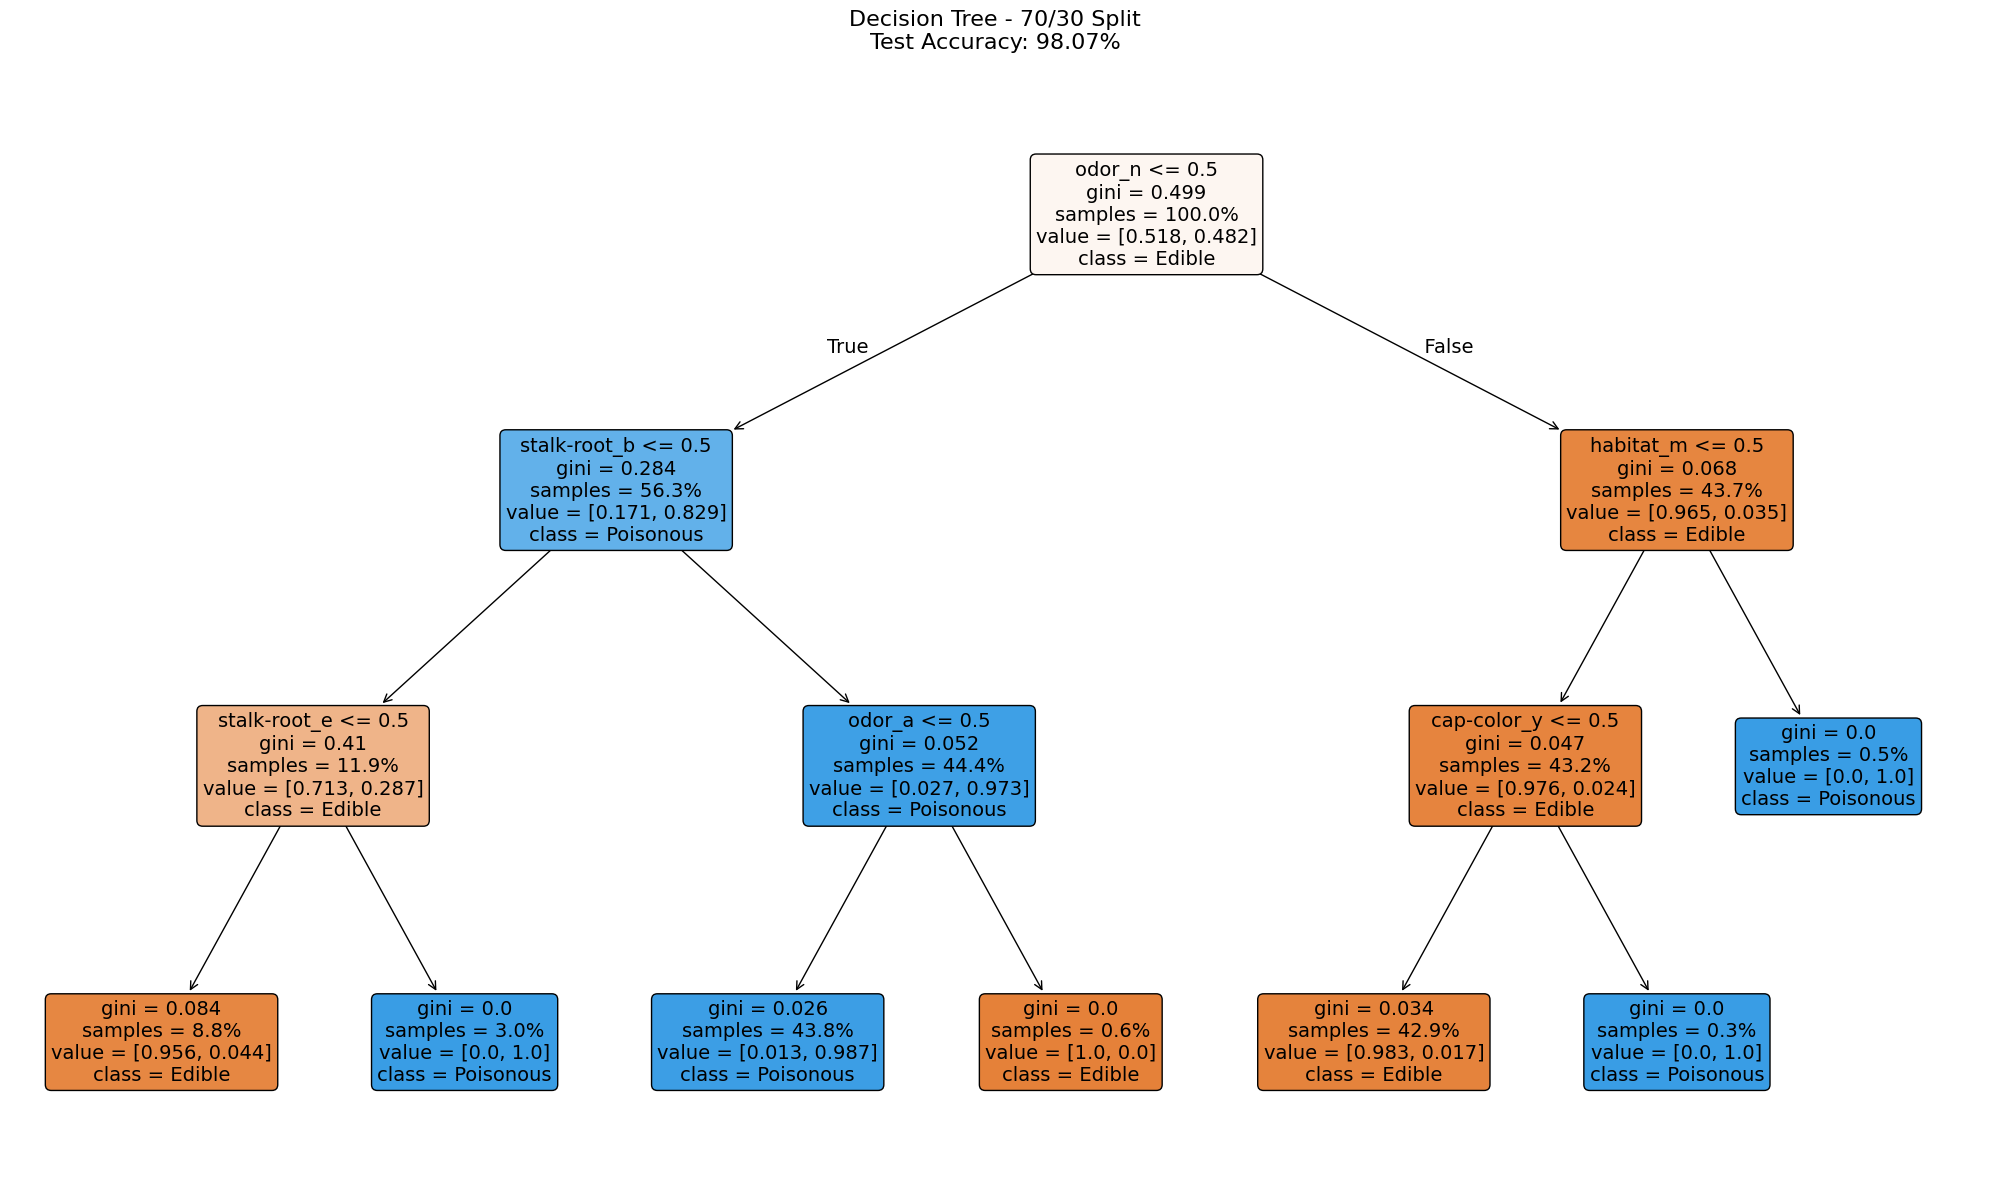


SPLIT: 80/20 (Test Size: 0.2)
Training set size: 6499
Test set size: 1625

=== DECISION TREE RESULTS ===
Test Accuracy: 97.97%
Confusion Matrix:
[[830  12]
 [ 21 762]]


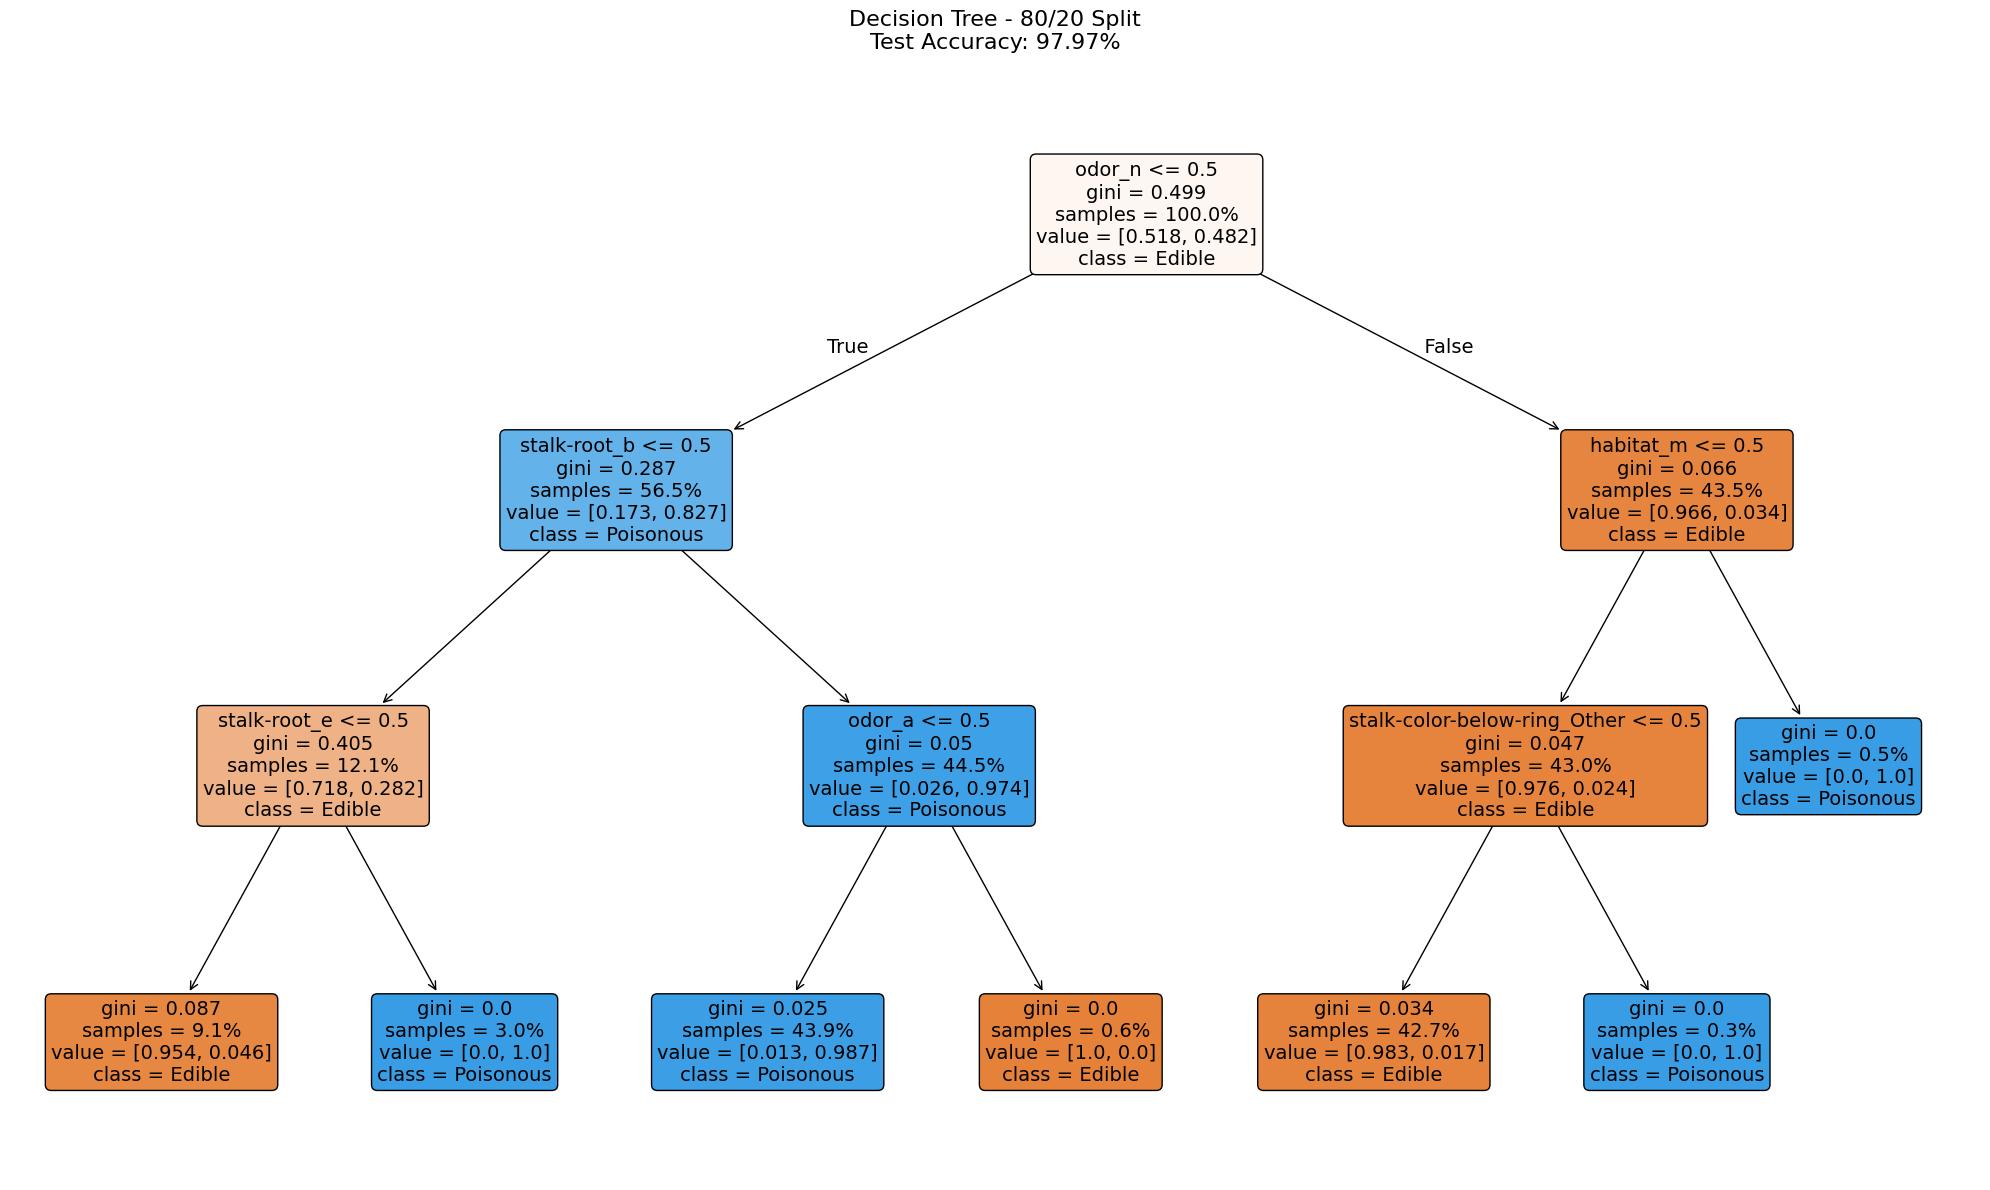

In [11]:
# experimenting with different data split ratios
for i, test_size in enumerate(split_ratios):
    print(f"\n{'='*50}")
    print(f"SPLIT: {split_names[i]} (Test Size: {test_size})")
    print(f"{'='*50}")

    # splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y  # startification helps by maintaining class balance in splits
    )

    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    # Initializing the Decision Tree classifier (Gini)
    dt_model = DecisionTreeClassifier(
        criterion='gini',
        random_state=42,
        max_depth=3
    )


    # training the model & making predictions
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)


    # displaying model performance metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("\n=== DECISION TREE RESULTS ===")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    print(f"Confusion Matrix:")
    print(cm)



    # visualizing the decision tree
    plt.figure(figsize=(20, 12))
    plot_tree(dt_model,
             filled=True,
             feature_names=X.columns,
             class_names=['Edible', 'Poisonous'],
             rounded=True,
             fontsize=14,
             proportion=True)

    plt.title(f'Decision Tree - {split_names[i]} Split\nTest Accuracy: {test_accuracy:.2%}',
              fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

### Confusion Matrix Visualization

We display three confusion matrices side-by-side, one for each data split we tested. Each box shows:

* How many mushrooms were correctly classified as edible or poisonous

* How many were misclassified

* The overall accuracy percentage

This visual comparison makes it easy to see which data split gives the best results and whether the model makes consistent mistakes across different training scenarios.

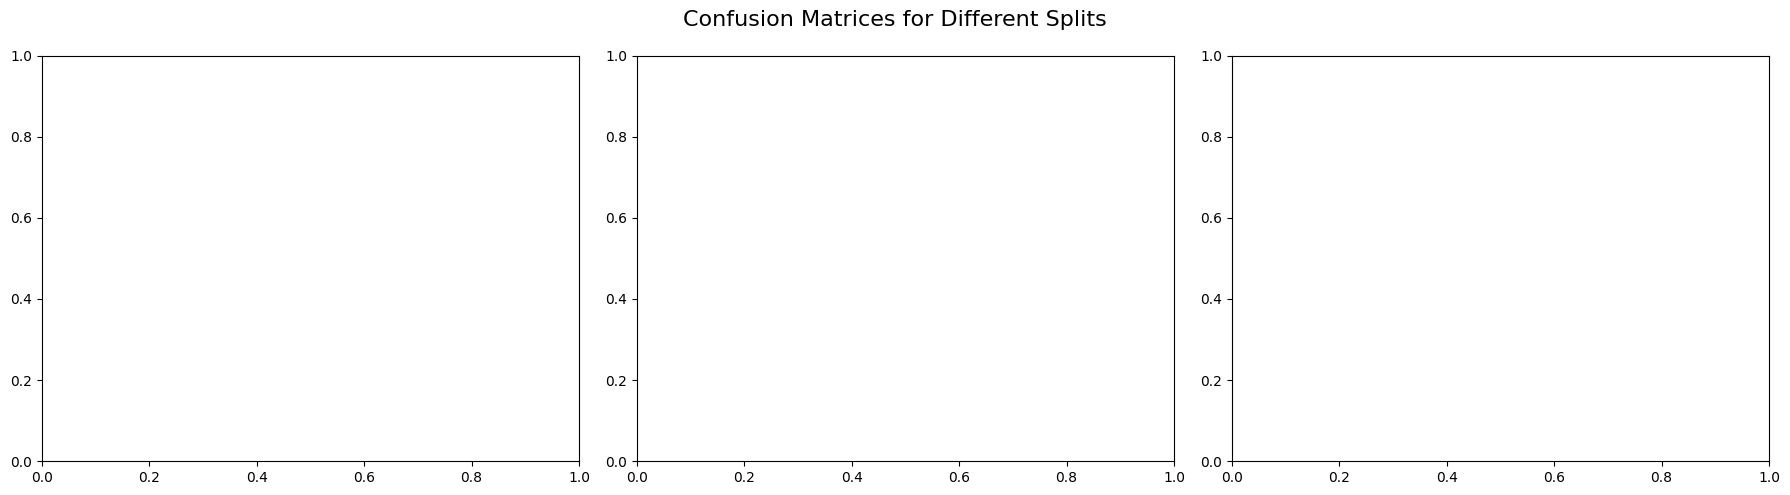

In [12]:
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
fig_cm.suptitle('Confusion Matrices for Different Splits', fontsize=16)

for i, result in enumerate(results):
    ax = axes_cm[i]
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
    ax.set_title(f'Confusion Matrix - {result["split"]} Split\nAccuracy: {result["test_accuracy"]:.2%}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()




### Summary of results

In conclusion, The model demonstrates consistently high performance (>97.9% accuracy) across all data splits, with a slight decrease in test accuracy as the size of the training set increases. This suggests the model is robust and not heavily dependent on the specific split ratio used in this experiment.

In [13]:
print(f"\n{'='*80}")
print("SUMMARY OF RESULTS (Gini index)")
print(f"{'='*80}")
print(f"{'Split Ratio':<10} {'Train Size':<10} {'Test Size':<10}  {'Test Acc':<12}")
print(f"{'-'*80}")

for result in results:
    print(f"{result['split']:<10} {result['train_size']:<10} {result['test_size']:<10}    {result['test_accuracy']:.2%}")


SUMMARY OF RESULTS (Gini index)
Split Ratio Train Size Test Size   Test Acc    
--------------------------------------------------------------------------------


## **b. Decision Tree (Entropy)**

In [14]:
X_entropy = df.drop("class", axis=1)
y_entropy = df["class"]

SPLIT: 60/40 (Test Size: 0.40)

Training set size: 4874
Test set size: 3250
Accuracy (60/40 - Entropy): 96.92%
Confusion Matrix (60/40 - Entropy):
 [[1683    0]
 [ 100 1467]]

----------------------------------------------------------------------



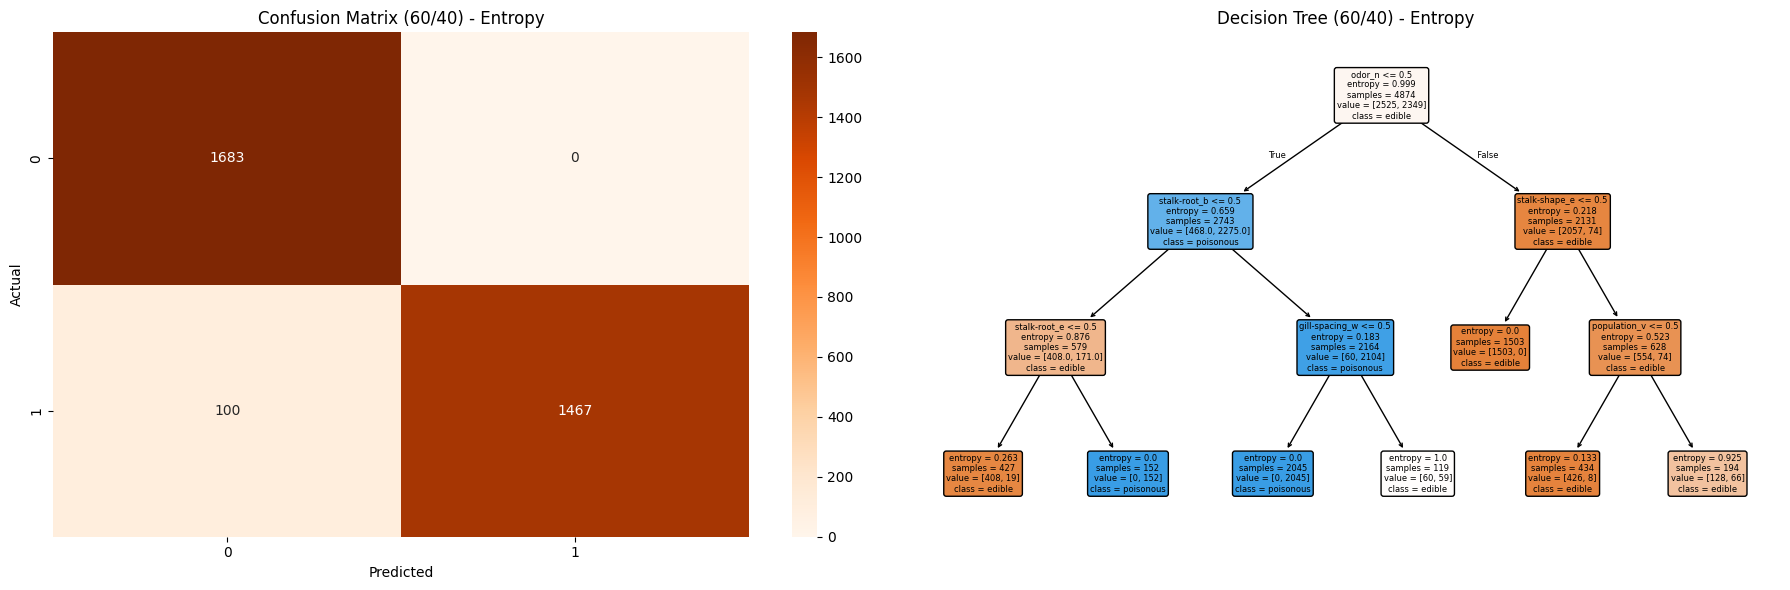

In [15]:
# === 60/40 SPLIT ===

Xtr_60_entropy, Xte_40_entropy, ytr_60_entropy, yte_40_entropy = train_test_split(
    X_entropy, y_entropy, test_size=0.40, random_state=42, stratify=y_entropy
)

entropy_model_60 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=3
)
entropy_model_60.fit(Xtr_60_entropy, ytr_60_entropy)

y_pred_60_entropy = entropy_model_60.predict(Xte_40_entropy)

acc_60_entropy = accuracy_score(yte_40_entropy, y_pred_60_entropy)
cm_60_entropy = confusion_matrix(yte_40_entropy, y_pred_60_entropy)


print(f"SPLIT: 60/40 (Test Size: 0.40)\n")

print(f"Training set size: {len(Xtr_60_entropy)}")
print(f"Test set size: {len(Xte_40_entropy)}")
print(f"Accuracy (60/40 - Entropy): {acc_60_entropy * 100:.2f}%")
print("Confusion Matrix (60/40 - Entropy):\n", cm_60_entropy)

print("\n" + "-"*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_60_entropy, annot=True, cmap="Oranges", fmt='g', ax=axes[0])
axes[0].set_title("Confusion Matrix (60/40) - Entropy")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

tree.plot_tree(
    entropy_model_60,
    filled=True,
    feature_names=X_entropy.columns,
    class_names=['edible', 'poisonous'],
    rounded=True,
    fontsize=6,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (60/40) - Entropy")

plt.tight_layout()
plt.show()

The 60/40 split also reaches 96.92% accuracy. Even with a smaller training portion, the model performs strongly and maintains similar error patterns to the 70/30 split. The limited depth keeps the tree from overfitting, allowing it to capture the essential structure of the dataset.

---


SPLIT: 70/30 (Test Size: 0.30)

Training set size: 5686
Test set size: 2438
Accuracy (70/30 - Entropy): 96.92%
Confusion Matrix (70/30 - Entropy):
 [[1234   29]
 [  46 1129]]

----------------------------------------------------------------------



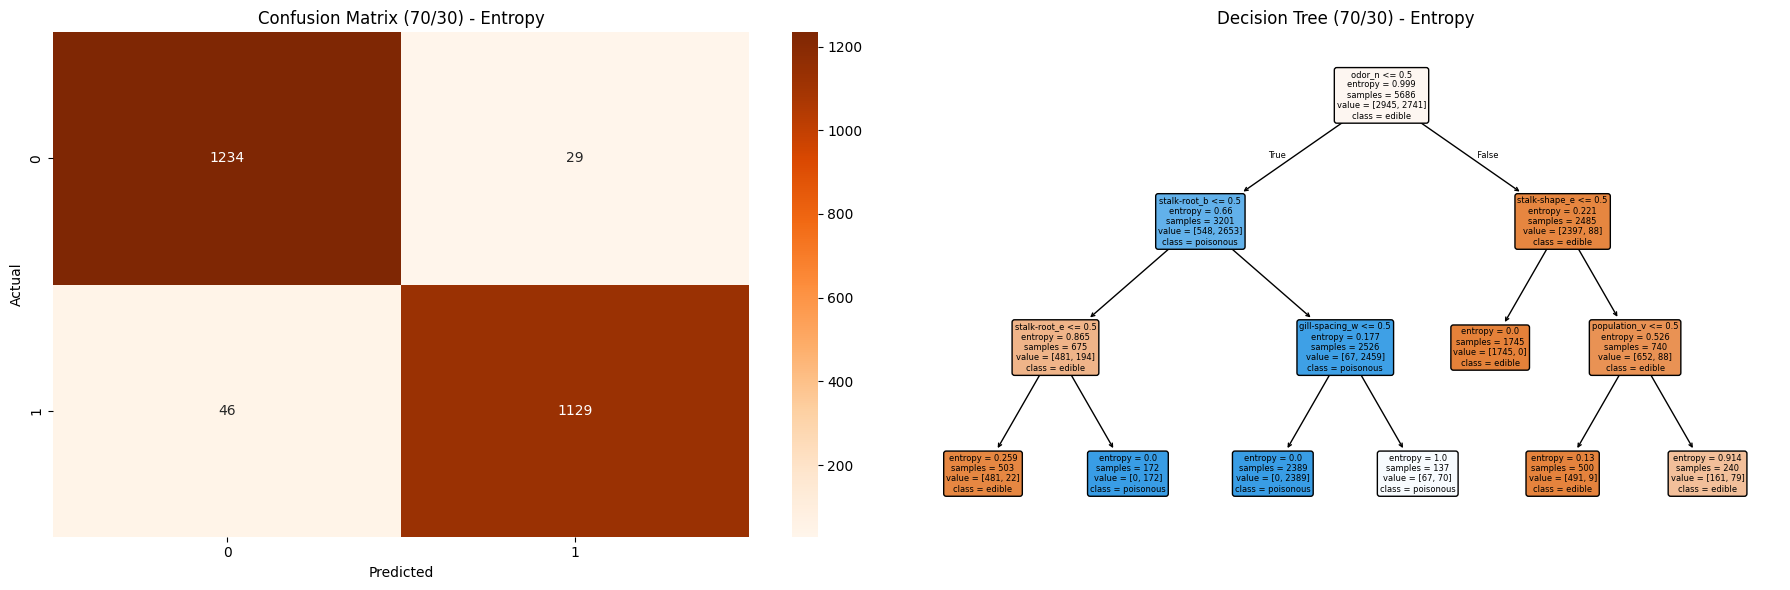

In [16]:
# === 70/30 SPLIT ===

Xtr_70_entropy, Xte_30_entropy, ytr_70_entropy, yte_30_entropy = train_test_split(
    X_entropy, y_entropy, test_size=0.30, random_state=42, stratify=y_entropy
)

entropy_model_70 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=3
)
entropy_model_70.fit(Xtr_70_entropy, ytr_70_entropy)

y_pred_70_entropy = entropy_model_70.predict(Xte_30_entropy)

acc_70_entropy = accuracy_score(yte_30_entropy, y_pred_70_entropy)
cm_70_entropy = confusion_matrix(yte_30_entropy, y_pred_70_entropy)

print(f"SPLIT: 70/30 (Test Size: 0.30)\n")

print(f"Training set size: {len(Xtr_70_entropy)}")
print(f"Test set size: {len(Xte_30_entropy)}")
print(f"Accuracy (70/30 - Entropy): {acc_70_entropy * 100:.2f}%")
print("Confusion Matrix (70/30 - Entropy):\n", cm_70_entropy)

print("\n" + "-"*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_70_entropy, annot=True, cmap="Oranges", fmt='g', ax=axes[0])
axes[0].set_title("Confusion Matrix (70/30) - Entropy")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

tree.plot_tree(
    entropy_model_70,
    filled=True,
    feature_names=X_entropy.columns,
    class_names=['edible', 'poisonous'],
    rounded=True,
    fontsize=6,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (70/30) - Entropy")

plt.tight_layout()
plt.show()


In the 70/30 split, the model achieves 96.92% accuracy, showing stable performance with a balanced amount of training and testing data. The confusion matrix reflects consistent and controlled errors, indicating that the entropy-based tree generalizes well while maintaining a limited depth.

---


SPLIT: 80/20 (Test Size: 0.20)

Training set size: 6499
Test set size: 1625
Accuracy (80/20 - Entropy): 96.68%
Confusion Matrix (80/20 - Entropy):
 [[820  22]
 [ 32 751]]

----------------------------------------------------------------------



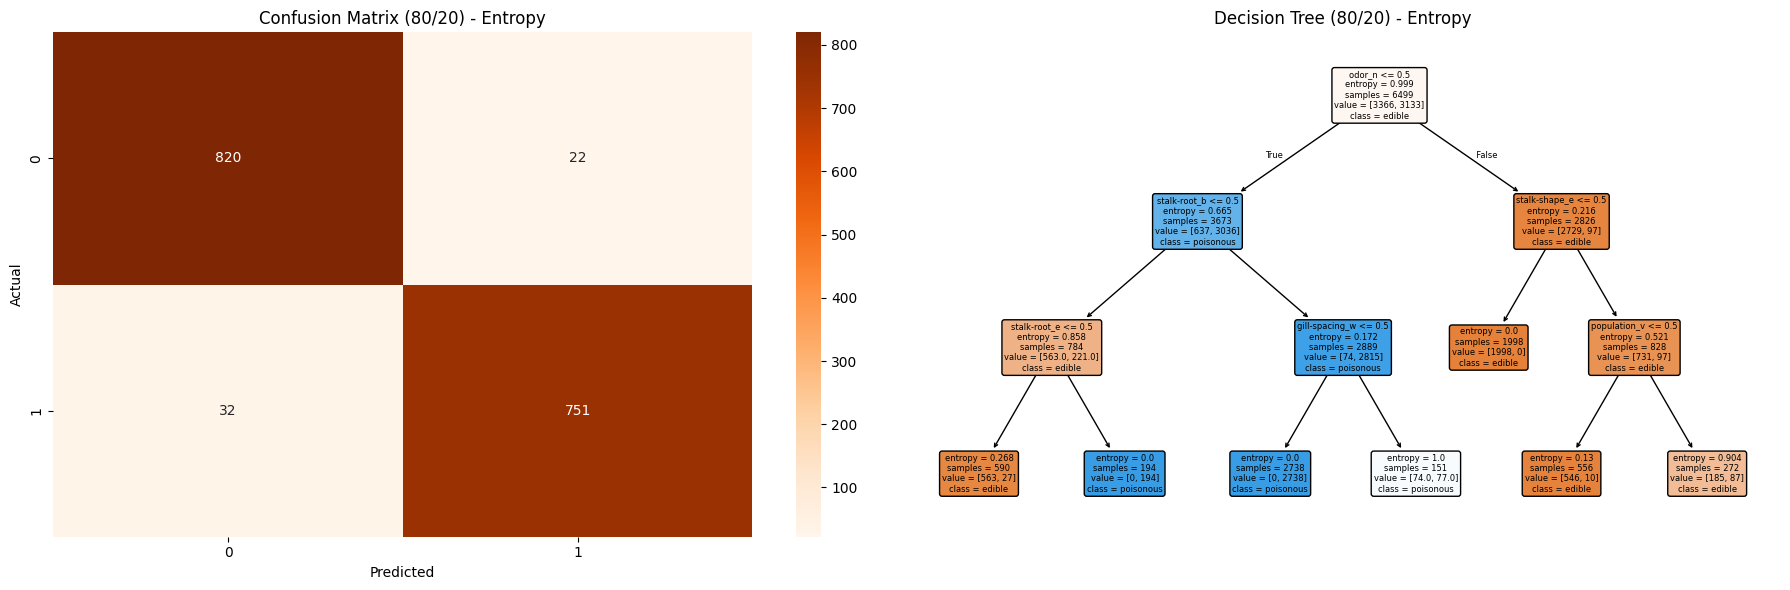

In [17]:
# === 80/20 SPLIT ===

Xtr_80_entropy, Xte_20_entropy, ytr_80_entropy, yte_20_entropy = train_test_split(
    X_entropy, y_entropy, test_size=0.20, random_state=42, stratify=y_entropy
)

entropy_model_80 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=3
)
entropy_model_80.fit(Xtr_80_entropy, ytr_80_entropy)

y_pred_80_entropy = entropy_model_80.predict(Xte_20_entropy)

acc_80_entropy = accuracy_score(yte_20_entropy, y_pred_80_entropy)
cm_80_entropy = confusion_matrix(yte_20_entropy, y_pred_80_entropy)

print(f"SPLIT: 80/20 (Test Size: 0.20)\n")

print(f"Training set size: {len(Xtr_80_entropy)}")
print(f"Test set size: {len(Xte_20_entropy)}")
print(f"Accuracy (80/20 - Entropy): {acc_80_entropy * 100:.2f}%")
print("Confusion Matrix (80/20 - Entropy):\n", cm_80_entropy)

print("\n" + "-"*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_80_entropy, annot=True, cmap="Oranges", fmt='g', ax=axes[0])
axes[0].set_title("Confusion Matrix (80/20) - Entropy")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

tree.plot_tree(
    entropy_model_80,
    filled=True,
    feature_names=X_entropy.columns,
    class_names=['edible', 'poisonous'],
    rounded=True,
    fontsize=6,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (80/20) - Entropy")

plt.tight_layout()
plt.show()


The 80/20 split gives the model the largest training portion, resulting in an accuracy of 96.68%. The confusion matrix shows a small number of misclassifications in both classes. With max_depth=3, the tree remains simple and avoids overfitting, but it cannot fully capture all detailed patterns in the larger training set, which explains the slight drop compared to the other splits.

---


In [18]:
print(f"\n{'='*80}")
print("SUMMARY OF RESULTS (Entropy)")
print(f"{'='*80}")

print(f"{'Split Ratio':<10} {'Train Size':<12} {'Test Size':<12} {'Test Acc':<12}")
print(f"{'-'*80}")

print(f"{'60/40':<10} {len(Xtr_60_entropy):<12} {len(Xte_40_entropy):<12} {acc_60_entropy:.2%}")
print(f"{'70/30':<10} {len(Xtr_70_entropy):<12} {len(Xte_30_entropy):<12} {acc_70_entropy:.2%}")
print(f"{'80/20':<10} {len(Xtr_80_entropy):<12} {len(Xte_20_entropy):<12} {acc_80_entropy:.2%}")



SUMMARY OF RESULTS (Entropy)
Split Ratio Train Size   Test Size    Test Acc    
--------------------------------------------------------------------------------
60/40      4874         3250         96.92%
70/30      5686         2438         96.92%
80/20      6499         1625         96.68%


## Summary of results

---
The entropy model delivered stable performance across the three split ratios, with accuracies ranging between 96.68% and 96.92%. Both the 60/40 and 70/30 splits performed slightly better than the 80/20 split, but the differences were minimal. The confusion matrices show that misclassifications remained low in all cases, indicating that the model generalizes well even with changes in training size.


---

Overall, the entropy-based Decision Tree provided consistent and reliable results on the dataset. Limiting the depth to three levels helped prevent overfitting while still capturing the key patterns needed for accurate classification. The model proved effective, interpretable, and stable across all split configurations.


---



# 2. **Clustering**

In [19]:
!wget -O Preprocessed_dataset.csv "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/main/Dataset/Preprocessed_dataset.csv"

import pandas as pd
df = pd.read_csv("Preprocessed_dataset.csv")
df.head(), df.shape


--2025-11-21 00:11:26--  https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/main/Dataset/Preprocessed_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1317333 (1.3M) [text/plain]
Saving to: ‘Preprocessed_dataset.csv’

Preprocessed_datase 100%[===================>]   1.26M  --.-KB/s    in 0.08s   

2025-11-21 00:11:26 (16.0 MB/s) - ‘Preprocessed_dataset.csv’ saved [1317333/1317333]



(   class  odor_n  odor_f  stalk-surface-above-ring_k  \
 0      1       0       0                           0   
 1      0       0       0                           0   
 2      0       0       0                           0   
 3      1       0       0                           0   
 4      0       1       0                           0   
 
    stalk-surface-below-ring_k  gill-color_b  ring-type_p  spore-print-color_n  \
 0                           0             0            1                    0   
 1                           0             0            1                    1   
 2                           0             0            1                    1   
 3                           0             0            1                    0   
 4                           0             0            0                    1   
 
    spore-print-color_k  gill-spacing_w  ...  cap-color_Other  cap-shape_Other  \
 0                    1               0  ...                0                0  

In this step, we download the preprocessed mushroom dataset from the GitHub repository and load it into a pandas DataFrame. We also display the first few rows and the dataset shape to confirm that the file was imported correctly.

In [20]:
# فصل عمود الكلاس عن باقي الأعمدة (الكلسترنق ما يستخدمه)
X_clust = df.drop('class', axis=1)

X_clust.shape


(8124, 80)

Since clustering is an unsupervised task, we remove the `class` label from the dataset. The variable `X_clust` now contains only the feature columns that will be used for the K-means clustering process.

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = [2, 3, 4]
cluster_results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clust)

    sil = silhouette_score(X_clust, labels)
    wcss = kmeans.inertia_

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": wcss
    })

    print(f"K={k}, Silhouette={sil:.4f}, WCSS={wcss:.2f}")

K=2, Silhouette=0.1400, WCSS=56795.34
K=3, Silhouette=0.1568, WCSS=51007.55
K=4, Silhouette=0.1868, WCSS=45276.23


In this step, we apply K-means clustering using three different K values (2, 3, and 4). For each K, the model assigns cluster labels to all samples, then we calculate the Silhouette score and WCSS to evaluate the clustering quality. The results for each K value are stored and printed for comparison.


In [22]:
import pandas as pd

cluster_df = pd.DataFrame(cluster_results)
cluster_df

,K,Silhouette,WCSS
0,2,0.140017,56795.340659
1,3,0.156803,51007.546667
2,4,0.186792,45276.229345


Here we organize the clustering results into a DataFrame to make them easier to view and compare. This table summarizes the Silhouette score and WCSS for each tested K value.


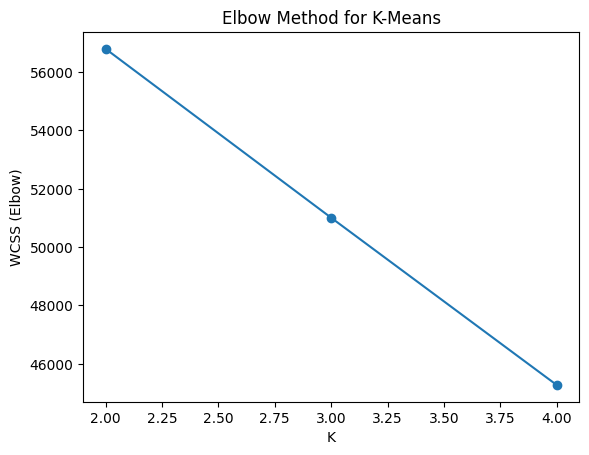

In [23]:
import matplotlib.pyplot as plt

plt.plot(cluster_df["K"], cluster_df["WCSS"], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS (Elbow)")
plt.title("Elbow Method for K-Means")
plt.show()


This plot shows the Elbow method by visualizing how WCSS changes for each K value. Since the curve decreases almost linearly, there is no clear elbow point, so WCSS alone cannot determine the best K.


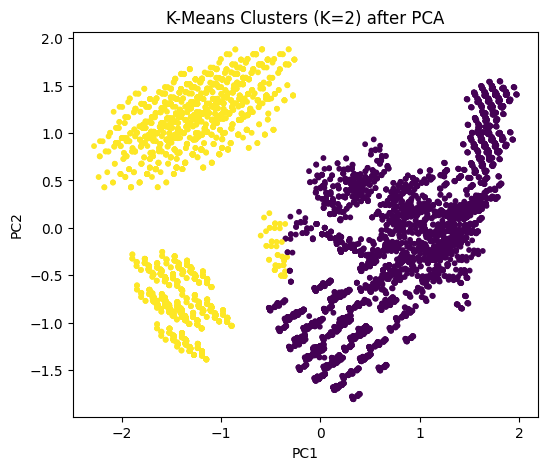

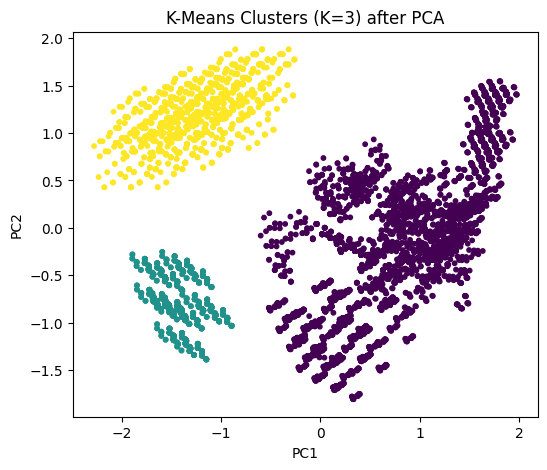

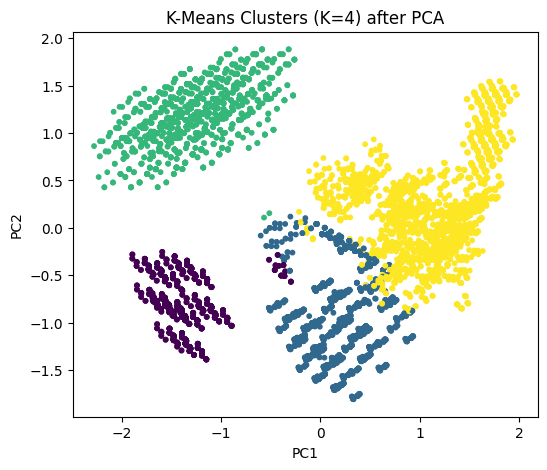

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تقليل الأبعاد إلى 2D لرسم الكلسترز
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust)

# رسم الكلسترز لكل قيمة من K (2، 3، 4)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clust)

    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"K-Means Clusters (K={k}) after PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

We use PCA to reduce the dataset to two dimensions so the clusters can be visualized. For each K value, we plot the PCA-transformed points and color them based on their cluster assignments to show how the data is grouped.
